In [16]:
#impotring the libraries
import numpy as np
import pandas as pd
#for visualizing
import matplotlib.pyplot as plt
import seaborn as sns
#for prediction
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

in this part we are importing the libraries we will be using in the code ahead and  Various libraries are imported for data manipulation (pandas, numpy), visualization (matplotlib, seaborn), and machine learning tasks (scikit-learn).

In [17]:
#loading the dataset
df = pd.read_csv('diabetic_data.csv')

: The dataset is loaded, and the structure is displayed. df.shape shows the number of rows and columns. df.info() provides information on columns, data types, and missing values, while df.head() displays the first few rows for a quick view.

In [18]:

#displaying the information
print("Dataset Shape:", df.shape)
print("Column Info:\n", df.info())
print("Sample Data:\n", df.head())

Dataset Shape: (101766, 50)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 50 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   encounter_id              101766 non-null  int64 
 1   patient_nbr               101766 non-null  int64 
 2   race                      101766 non-null  object
 3   gender                    101766 non-null  object
 4   age                       101766 non-null  object
 5   weight                    101766 non-null  object
 6   admission_type_id         101766 non-null  int64 
 7   discharge_disposition_id  101766 non-null  int64 
 8   admission_source_id       101766 non-null  int64 
 9   time_in_hospital          101766 non-null  int64 
 10  payer_code                101766 non-null  object
 11  medical_specialty         101766 non-null  object
 12  num_lab_procedures        101766 non-null  int64 
 13  num_procedures            10176

The dataset is loaded, and the structure is displayed. df.shape shows the number of rows and columns. df.info() provides information on columns, data types, and missing values, while df.head() displays the first few rows for a quick view.

In [19]:
#replacing the empty values and the columns with all empty rows
df.replace("?", np.nan, inplace=True)
df.dropna(axis=1, how='all', inplace=True)


Missing values represented by "?" are replaced with NaN, and columns with all values missing are dropped, keeping only the columns with meaningful data

In [20]:
#filling missing value in numeric columns with mean and
#catagorical data with the mode
for column in df.columns:
    if df[column].dtype in ['float64', 'int64']:
        median_value = df[column].median()
        df[column].fillna(median_value, inplace=True)
    else:
        mode_value = df[column].mode()[0]
        df[column].fillna(mode_value, inplace=True)


<ipython-input-20-b850fd7a3edc>:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[column].fillna(median_value, inplace=True)
<ipython-input-20-b850fd7a3edc>:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using '

For numeric columns, missing values are filled with the median to maintain central tendency, while categorical columns are filled with the mode (most common value) to preserve category frequency.


In [21]:
age_map = {
    '[0-10)': 5, '[10-20)': 15, '[20-30)': 25, '[30-40)': 35, '[40-50)': 45,
    '[50-60)': 55, '[60-70)': 65, '[70-80)': 75, '[80-90)': 85, '[90-100)': 95
}
df['age'] = df['age'].map(age_map)


Age intervals (e.g., [20-30)) are mapped to their midpoints for better numeric representation. For instance, [20-30) is converted to 25, making age a continuous numeric variable.

In [22]:

#making data more readable
#addig the column in which categorizing the data as the readmitted and those donnot readmitted
df['readmitted_binary'] = df['readmitted'].apply(lambda x: 1 if x in ['<30', '>30'] else 0)
df['readmitted_binary'] = pd.to_numeric(df['readmitted_binary'], errors='coerce')



A new column, readmitted_binary, is added to label patients as either readmitted (1) or not (0), simplifying the original readmitted column.

In [23]:
scaler_minmax = MinMaxScaler()
scaler_standard = StandardScaler()
df[['time_in_hospital', 'num_lab_procedures', 'num_medications']] = scaler_minmax.fit_transform(
    df[['time_in_hospital', 'num_lab_procedures', 'num_medications']]
)
scaler_minmax = MinMaxScaler()
df[['age', 'time_in_hospital', 'num_lab_procedures', 'num_medications', 'number_diagnoses']] = scaler_minmax.fit_transform(
    df[['age', 'time_in_hospital', 'num_lab_procedures', 'num_medications', 'number_diagnoses']]
)

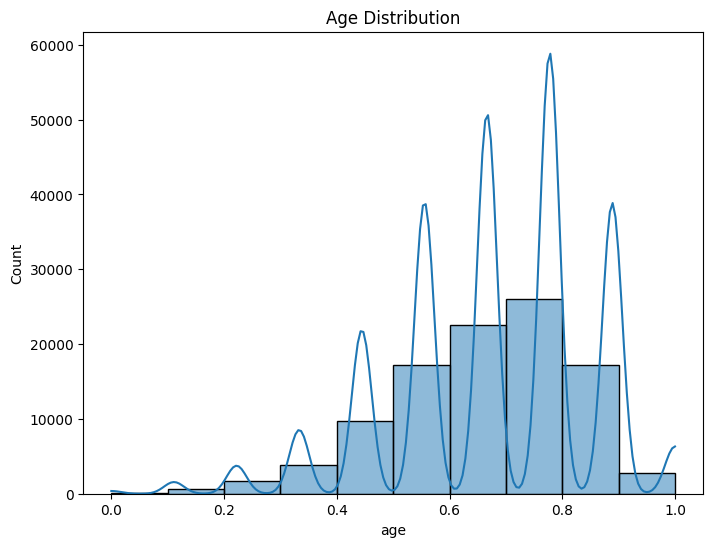

In [24]:

#VISUALIZATION

# Visualizing  individual variables
# Age
plt.figure(figsize=(8, 6))
sns.histplot(df['age'], kde=True, bins=10)
plt.title("Age Distribution")
plt.show()


 Visualizes the distribution of age (histogram) and makes the data to be ready for visualization

<ipython-input-25-90966373b9a7>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='readmitted', data=df, palette='viridis')


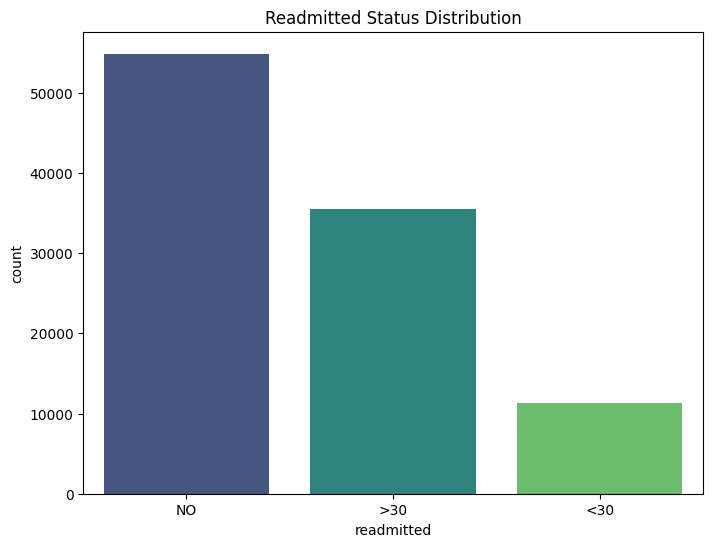

In [25]:

# Readmission dist.
plt.figure(figsize=(8, 6))
sns.countplot(x='readmitted', data=df, palette='viridis')
plt.title("Readmitted Status Distribution")
plt.show()


 counts of each readmission status (bar plot), providing insights into the spread and frequency of these variables.

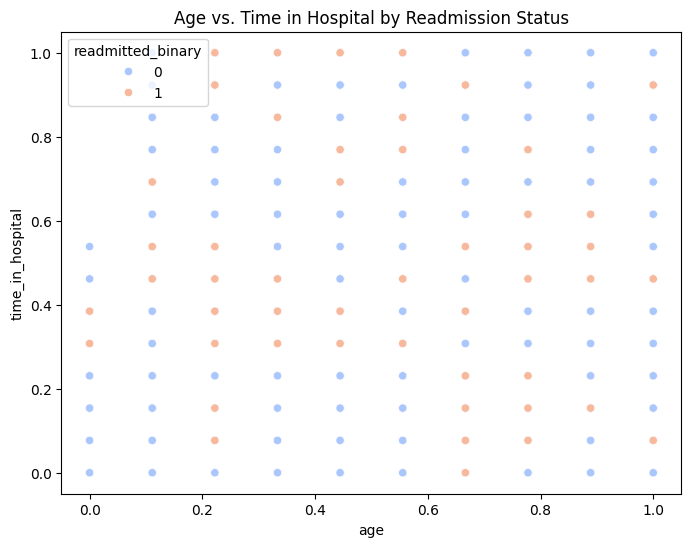

In [26]:


# Visualizing the relationships among pairs(BIVARIATE)
# graph showing relation among age the time passed in the hospital
plt.figure(figsize=(8, 6))
sns.scatterplot(x='age', y='time_in_hospital', data=df, hue='readmitted_binary', palette='coolwarm')
plt.title("Age vs. Time in Hospital by Readmission Status")
plt.show()


This scatter plot shows the relationship between age and time_in_hospital, colored by readmission_binary to help identify trends in readmission relative to these factors

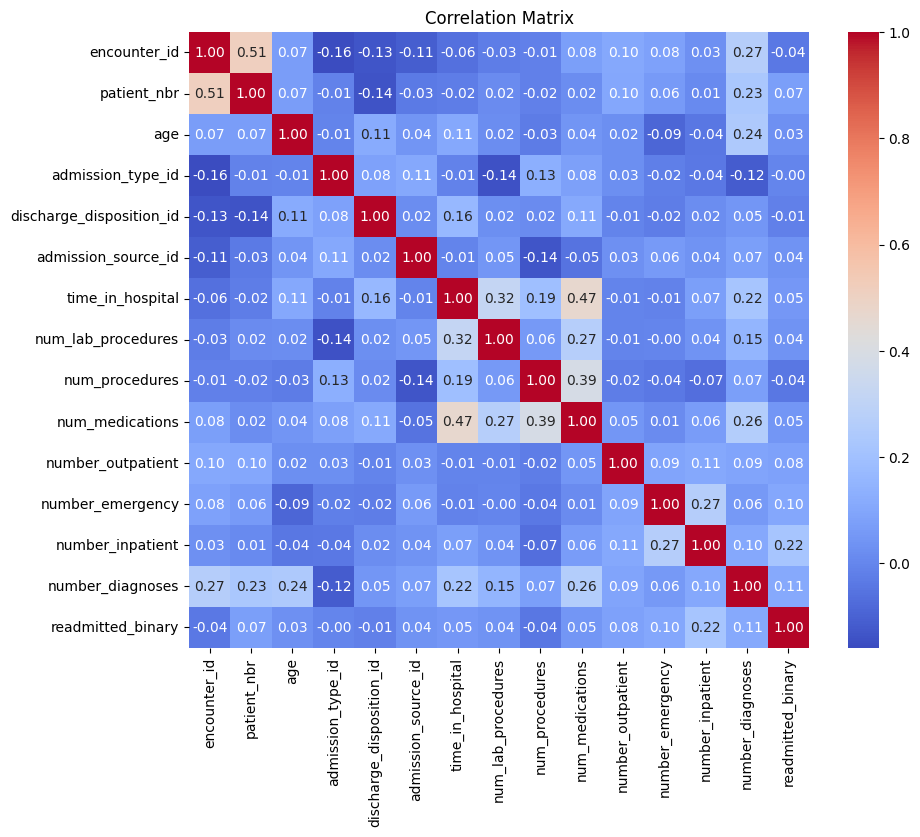

In [27]:

# selecting the numeric data
numeric_df = df.select_dtypes(include=[np.number])
#correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(numeric_df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix")
plt.show()


 The heatmap reveals correlations among numeric variables, helping identify which features are most interrelated and useful for predictive modeling.
python
Copy code


<Figure size 1200x800 with 0 Axes>

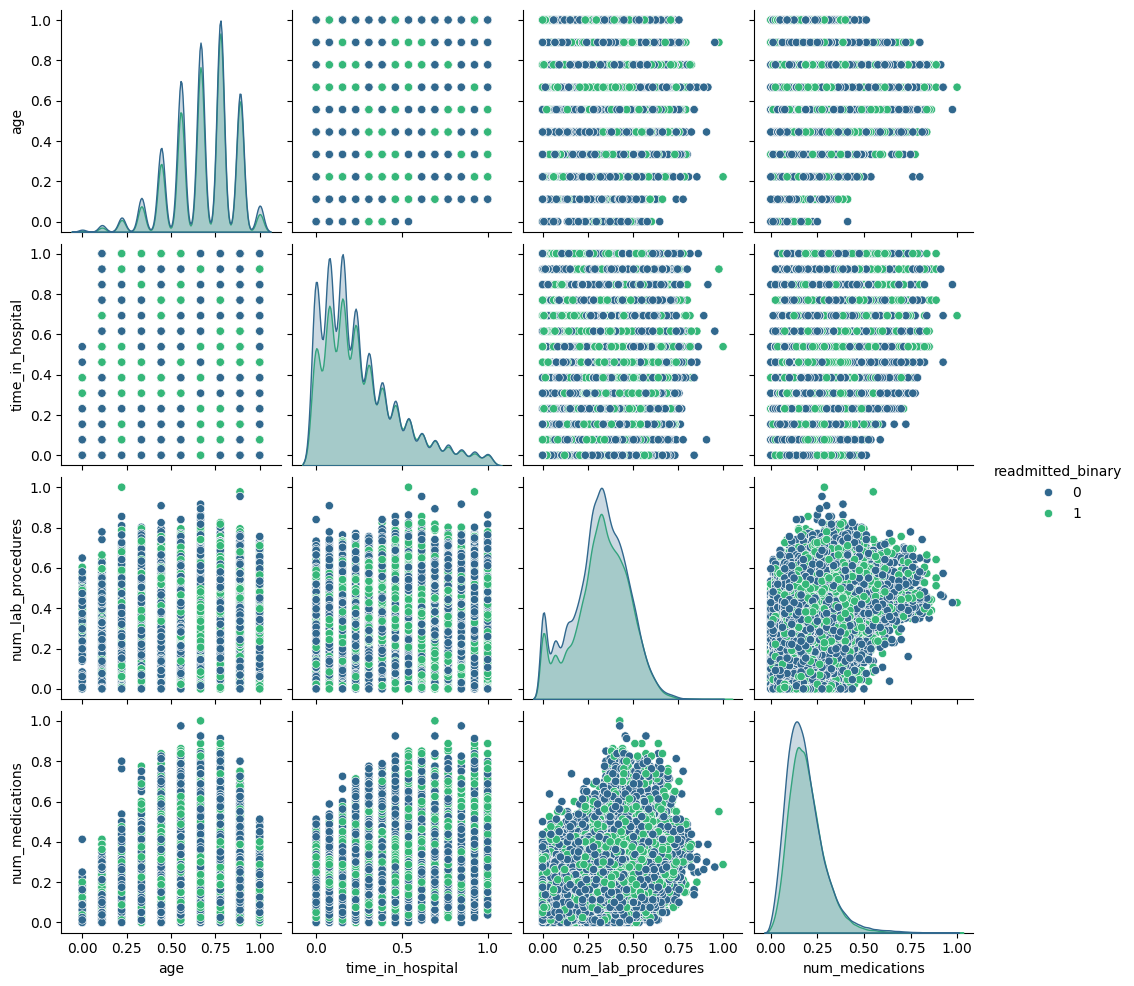

In [28]:

# 3 Visualizing multivariables
plt.figure(figsize=(12, 8))
sns.pairplot(df, vars=['age', 'time_in_hospital', 'num_lab_procedures', 'num_medications'],
             hue='readmitted_binary', palette='viridis')
plt.show()

This pair plot shows interactions among multiple numeric variables (e.g., age, time_in_hospital) and highlights differences by readmitted_binary, providing a deeper view of feature relationships.

In [29]:

#making the x and y for the tabular dispaly
X = numeric_df.drop(columns=['readmitted_binary'], errors='ignore')  # Features
y = df['readmitted_binary']  # Target variable

# Stratified Train-Test Split (to maintain class distribution in both sets)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)


Train-Test Split: X and y are defined as feature and target datasets, respectively. The data is then split into training and test sets (80%-20% split) for model evaluation.

In [30]:

# Train model
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(random_state=42, n_estimators=200, max_depth=10, class_weight='balanced')
model.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', max_depth=10, n_estimators=200,
                       random_state=42)

A RandomForestClassifier is initialized and trained on the training data (X_train, y_train). This classifier will later predict readmission status.

In [31]:
# Prediction of our model enteries
y_pred = model.predict(X_test)
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Confusion Matrix:
 [[11048  5411]
 [ 4954  9117]]

Classification Report:
               precision    recall  f1-score   support

           0       0.69      0.67      0.68     16459
           1       0.63      0.65      0.64     14071

    accuracy                           0.66     30530
   macro avg       0.66      0.66      0.66     30530
weighted avg       0.66      0.66      0.66     30530



Model Evaluation: The model’s predictions on X_test are compared with actual values in y_test using a confusion matrix and classification report to assess accuracy, precision, recall, and F1-score.

In [32]:

# saving the cleaned data
df.to_csv('cleaned_diabetic_data.csv', index=False)
print("Cleaned data saved to 'cleaned_diabetic_data.csv'")

Cleaned data saved to 'cleaned_diabetic_data.csv'


Saving the Cleaned Data: The cleaned and processed dataset is saved to a CSV file named cleaned_diabetic_data.csv, without the index column, to share or reuse in future analysis

In [33]:
#importing libs
from sklearn import datasets
import pandas as pd
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score, roc_curve
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

In [35]:
#loading dataset
df1 = pd.read_csv('cleaned_diabetic_data.csv')
df1.head()

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted,readmitted_binary
0,2278392,8222157,Caucasian,Female,0.000000,[75-100),6,25,1,0.000000,...,No,No,No,No,No,No,No,No,NO,0
1,149190,55629189,Caucasian,Female,0.111111,[75-100),1,1,7,0.153846,...,Up,No,No,No,No,No,Ch,Yes,>30,1
2,64410,86047875,AfricanAmerican,Female,0.222222,[75-100),1,1,7,0.076923,...,No,No,No,No,No,No,No,Yes,NO,0
3,500364,82442376,Caucasian,Male,0.333333,[75-100),1,1,7,0.076923,...,Up,No,No,No,No,No,Ch,Yes,NO,0
4,16680,42519267,Caucasian,Male,0.444444,[75-100),1,1,7,0.000000,...,Steady,No,No,No,No,No,Ch,Yes,NO,0



#**Standardization**
It converts categorical columns to numeric using label encoding and standardizes the numerical columns.Before the pca application this step is compulsory

In [36]:
#standardizing features
label_encoder = LabelEncoder()
for i in df1.columns:
  if df1[i].dtypes=='string' or df1[i].dtypes=='object':
    df1[i] = label_encoder.fit_transform(df1[i])

numeric_cols = df1.select_dtypes(include=['float64','int64']).columns
scaler = StandardScaler()
scaler_data = df1[numeric_cols]= scaler.fit_transform(df1[numeric_cols])


FOR THE PCA METHOD:  
we standardize the columns by scaling which ensures that the weight for every numeric feature is equal, helping to train the model better.
Moreover, we use label encoder method.

LabelEncoder -> used for handling scaling of categorical columns

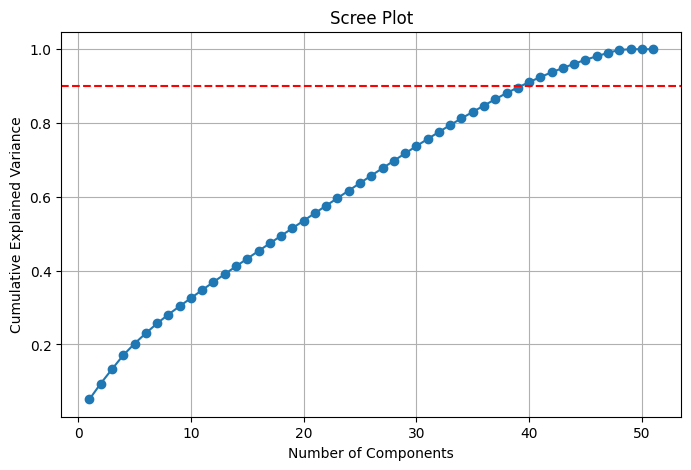

90% variance capturing componenets: 40


In [37]:
#applying PCA in the Scaled dataset
#1. using the Scree Plot to determine the no. of pca components
scaled_data = scaler.fit_transform(df1)
pca = PCA()
pca.fit(scaled_data)
#checking explained varience
exaplaine_var_ratio = pca.explained_variance_ratio_
cumulative_variance = exaplaine_var_ratio.cumsum()
#scree plot
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Scree Plot')
plt.grid(True)
plt.axhline(y=0.9, color='r', linestyle='--')  # Line at 90% variance
plt.show()

# Printing jahan tak 90% ya 95% aa raha hai
num_components_90 = next(i for i, cum_var in enumerate(cumulative_variance) if cum_var >= 0.9) + 1
print(f"90% variance capturing componenets: {num_components_90}")

#**Components selection**
This code applies PCA with 40 components to the scaled data, reducing its dimensionality, and stores the result in a new DataFrame with columns PC1 to PC40.

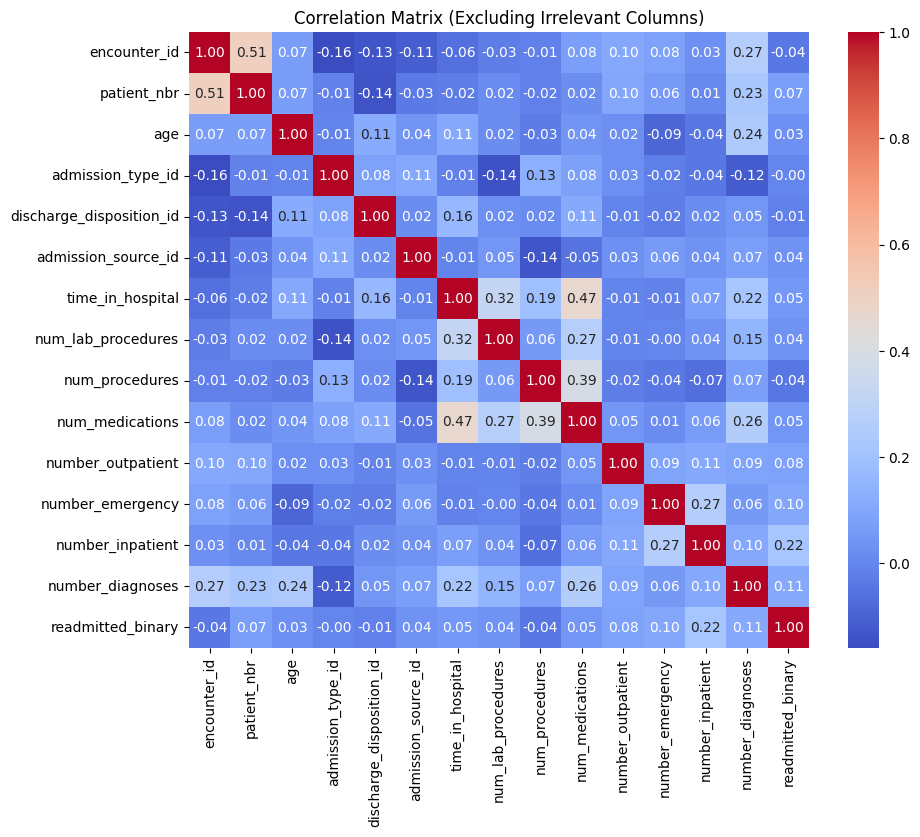

In [40]:
# Exclude irrelevant columns (replace 'id_column', 'name_column' with actual column names)
columns_to_exclude = ['id_column', 'name_column','race','admission_type-id','admission_source-id']  # Add column names not related to prediction
relevant_numeric_df = numeric_df.drop(columns=columns_to_exclude, errors='ignore')

# Correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(relevant_numeric_df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix (Excluding Irrelevant Columns)")
plt.show()


In [41]:
#taking no of principal componenets as 40
pca = PCA(n_components = 40)
pca.fit(scaled_data)
data_pca = pca.transform(scaled_data)
data_pca = pd.DataFrame(data_pca, columns = [f"PC{i}" for i in range(1,41)])
data_pca.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC31,PC32,PC33,PC34,PC35,PC36,PC37,PC38,PC39,PC40
0,-5.074219,-0.657813,-2.591930,1.400108,0.908542,1.710868,1.354231,0.316838,-0.395013,-0.462238,...,0.661896,-0.945853,-0.176120,1.035049,2.463900,-0.150880,1.355285,2.629389,-2.889866,-0.578717
1,0.445343,0.160637,-1.816918,-0.619079,1.805494,-1.205185,1.182271,-1.582128,-0.318249,-0.347354,...,-0.495898,0.452924,-0.309107,0.503658,-0.139527,-0.067803,0.933470,1.188836,-0.456317,-0.210528
2,-1.566070,-0.512986,-0.339163,-0.237390,0.908939,0.606794,1.861674,0.746203,0.077462,2.533737,...,-0.770393,-0.465050,-2.874252,-1.873365,0.410705,0.712770,0.295005,-1.632351,-1.151633,0.415033
3,-0.884143,-1.360573,-0.416843,-0.965629,0.539364,-0.585656,0.966234,-0.653767,-0.097993,-0.118557,...,0.389304,2.298511,-0.598578,0.197839,-0.346267,0.862616,0.299646,0.509716,-0.473083,-0.160409
4,-1.817659,-1.492959,-1.623902,-1.412088,0.959722,-1.504192,0.857425,-2.312611,0.346629,1.286901,...,1.047414,-0.238488,-0.232926,0.324839,-0.261335,-0.411142,0.296469,-0.311907,-0.783401,-0.116461



This code separates the features (X) and the target (y) from the dataframe, where X contains all columns except 'readmitted_binary', and y contains the target column 'readmitted_binary'

In [46]:
# Separating features (X) and target (y)
X = df1.drop('readmitted_binary', axis=1)
# All columns except the target column
y = df1['readmitted_binary']  # Target column

#**Splitting the data**
The data is splitted to prepare it for the final machine learning model

In [43]:
#splitting data for training and testing
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2,random_state = 42)

#**MODEL TRAINING**
This code converts the target labels (y_train and y_test) to binary integers and then trains a Random Forest classifier on the training data (X_train and y_train) with a fixed random seed for reproducibility

In [47]:
# Model training with Random Forest
# Converting continuous values to binary
y_train = (y_train).astype(int)
y_test = (y_test).astype(int)
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

# **FINAL EVALUATION**
This code evaluates a classification model's performance on a test dataset. It calculates key metrics like accuracy, precision, recall, F1-score, and ROC-AUC to measure the model's effectiveness. It also prints the confusion matrix to summarize correct and incorrect predictions. The probabilities of the positive class are used for ROC-AUC, while class labels are used for other metrics. All results are neatly displayed for interpretation

In [48]:
#evaluation
y_pred = model.predict(X_test)
y_prob= model.predict_proba(X_test)[:,1]
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
cof_matrix = confusion_matrix(y_test,y_pred)
roc_auc = roc_auc_score(y_test, y_prob)

print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")
print(f"ROC-AUC: {roc_auc:.2f}")
print(f"Confusion Matrix:\n{cof_matrix}")

Accuracy: 0.65
Precision: 0.64
Recall: 0.58
F1 Score: 0.61
ROC-AUC: 0.71
Confusion Matrix:
[[7867 3085]
 [3956 5446]]
